In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.axes_grid1 import AxesGrid
from skimage.registration import phase_cross_correlation

In [2]:
#load of the 4D STEM dataset. 
folder = 'Z:/4D-STEM/Roger/20220331 60 kV VTe2 grid 20210202/Position #4/4D-STEM/Low mag/ref/'
diff_data = np.load(folder+"data.npy")

Text(0.5, 1.0, 'averaged CBED')

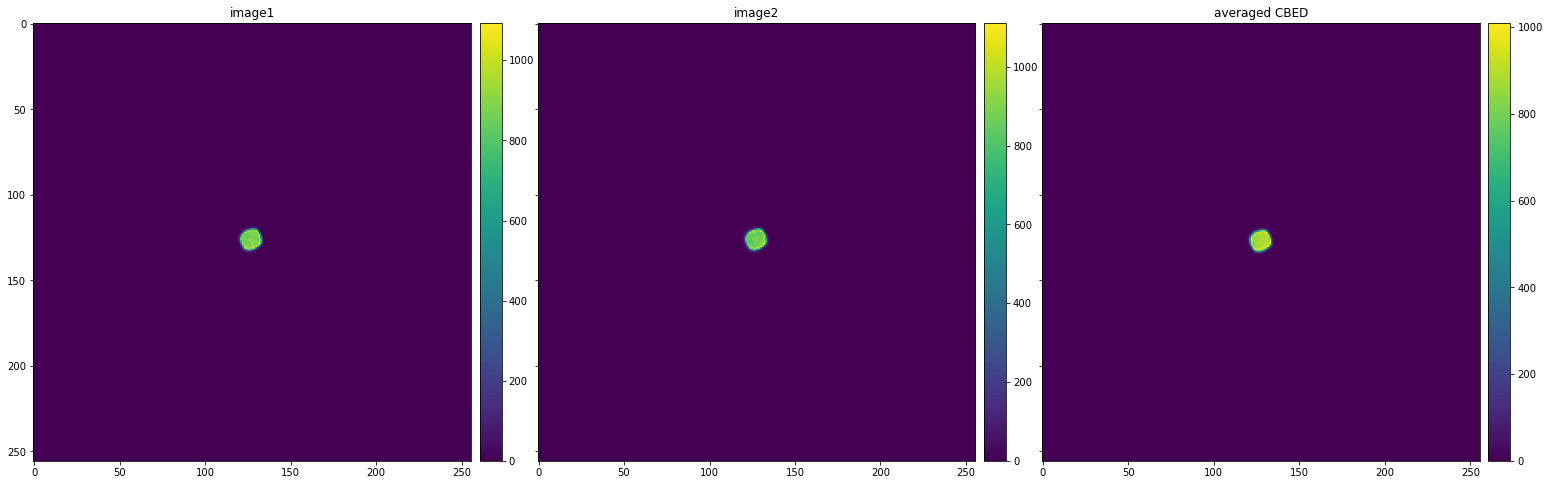

In [3]:
pacbed = np.average(diff_data, axis=(0,1))
#direct average the frame.
fig =plt.figure(1, figsize=(90, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(diff_data[0,1,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")
im=grid[1].imshow(diff_data[1,1,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("image2")
im=grid[2].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("averaged CBED")

Text(0.5, 1.0, 'image2')

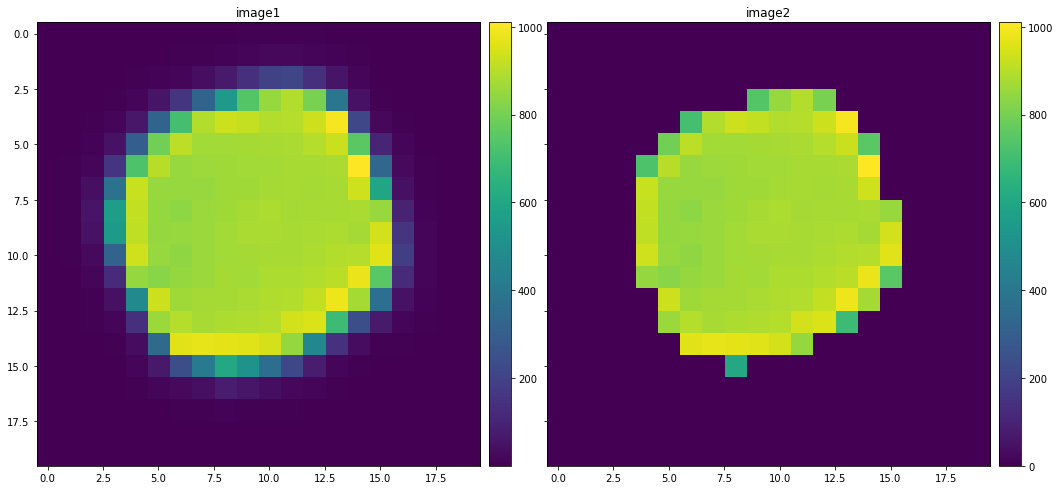

In [4]:
thresh = np.max(pacbed)*0.6
BFdisk = pacbed > thresh
mpacbed = pacbed * BFdisk
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed[118:138,118:138], cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")
im=grid[1].imshow(mpacbed[118:138,118:138], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("image2")

In [5]:
#Trim the CBED
trim_data = diff_data[:,:,118:138,118:138]
pacbed = np.average(trim_data, axis=(0,1))
thresh = np.max(pacbed)*0.3
BFdisk = pacbed > thresh
mpacbed = pacbed * BFdisk

In [6]:
#detrermine the center of mass of CBEDs.
def GetiCoM(dat4d: np.ndarray):
    """Get Ronchigram Center of Mass Shifts from 4D Dataset

    :param dat4d: 4D Dataset, 2-spatial, 2-diffraction dimensions
    :param RCX: X Center of the Ronchigram (pixels)
    :param RCY: Y Center of the Ronchigram (pixels)
    :param RCal: Calibration of the Ronchigram (pixels/mrad)
    :param RI: Inner Radius for CoM Measurement (mrad)
    :param RO: Outer Radius for CoM Measurement (mrad)
    :return iCoM as ndarray
    """
    #get the integrated center of mass image along x and y direction.
    X, Y = np.meshgrid(np.arange(0, dat4d.shape[3]), np.arange(0, dat4d.shape[2]))
    #get the averaged intensity of each CBED pattern.
    avg = np.average(dat4d, axis=(2,3))
    return np.average(dat4d * X, axis=(2,3))/avg, np.average(dat4d * Y, axis=(2,3))/avg

Text(0.5, 1.0, 'amplitude')

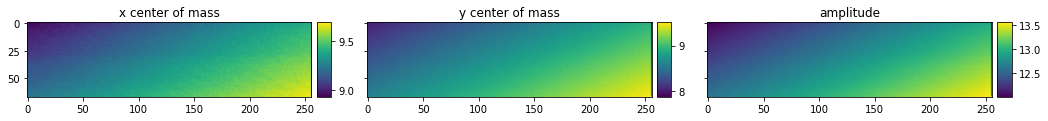

In [7]:
CoMX,CoMY=GetiCoM(trim_data)
#CoMX -= np.average(CoMX)
#CoMY -= np.average(CoMY)
fig =plt.figure(1, figsize=(60, 40))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(CoMX, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("x center of mass")
im=grid[1].imshow(CoMY, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("y center of mass")
im=grid[2].imshow(np.sqrt(CoMY*CoMY+CoMX*CoMX), cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("amplitude")

In [8]:
ShiftX = np.zeros_like(CoMX)
ShiftY = np.zeros_like(CoMY)
for i in range(trim_data.shape[0]):
    for j in range(trim_data.shape[1]):
        shift, error, diffphase = phase_cross_correlation(pacbed, trim_data[i, j],  upsample_factor=100)
        ShiftX[i, j] = shift[1]
        ShiftY[i, j] = shift[0]

Text(0.5, 1.0, 'amplitude')

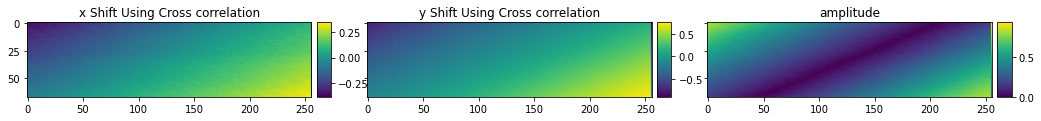

In [9]:
#direct average the frame.
fig =plt.figure(1, figsize=(60, 40))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(-ShiftX, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("x Shift Using Cross correlation")
im=grid[1].imshow(-ShiftY, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("y Shift Using Cross correlation")
im=grid[2].imshow(np.sqrt(ShiftX*ShiftX+ShiftY*ShiftY), cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("amplitude")

In [10]:
np.save(folder+"template.npy", pacbed)
np.save(folder+"ref comx.npy", CoMX)
np.save(folder+"ref comy.npy", CoMY)
np.save(folder+"ref shiftx.npy", ShiftX)
np.save(folder+"ref shifty.npy", ShiftY)